In [1]:
# this script generates a LHC sampling of the parameter space
# and creates files with the values of the parameters

In [1]:
import numpy as np
from scipy.stats import qmc
import matplotlib.pyplot as plt

In [2]:
# parameter bounds for the PPE 1
Emid_bounds = [2e-5, 3e-4]
Epen_bounds = [2e-5, 6e-4]
Edd_bounds = [5e-5, 6e-4]
Taumf_bounds = [200, 10000]
Pr_bounds = [5e-1, 1.2]
R0top_bounds = [5e-1, 9e-1]
bounds=[Emid_bounds, Epen_bounds, Edd_bounds, Taumf_bounds, Pr_bounds, R0top_bounds]

In [4]:
# create LHC sample
nvar=6 #number of parameter
n_samplemany=3 #number of samples, to adjust

#LHC
sampler = qmc.LatinHypercube(d=nvar)     #d number of parameters 
samplemanyy = sampler.random(n=n_samplemany) #n number of samples

XLHC=np.zeros((n_samplemany,nvar))

for iv in np.arange(0,nvar):
    XLHC[:,iv]=np.min(bounds[iv])+(np.max(bounds[iv])-np.min(bounds[iv]))*samplemanyy[:,iv]

In [5]:
#bounds in Giorgetta et al 2018 
iEmid_bounds = [1e-4, 2e-4]
iEpen_bounds = [1e-4, 4e-4]
iEdd_bounds = [2e-4, 4e-4]
iTaumf_bounds = [3600, 7200]
iPr_bounds = [8e-1, 1]
iR0top_bounds = [7e-1, 8e-1]
ibounds=[iEmid_bounds, iEpen_bounds, iEdd_bounds, iTaumf_bounds, iPr_bounds, iR0top_bounds]

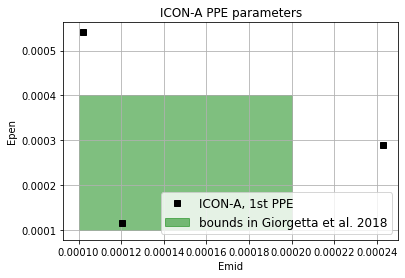

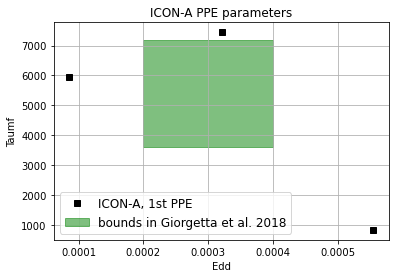

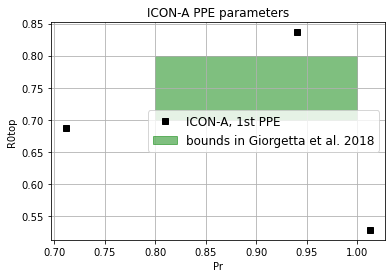

In [6]:
# Plot the parameter sample in the parameter space

labels=['Emid','Epen','Edd','Taumf', 'Pr', 'R0top']

#initial bounds
nvar=6
plt.rcParams["legend.fontsize"] = 12
plt.rc('font', size=12) 
plt.rcParams['figure.figsize'] = [7, 5]

for p1 in [0,2,4]:
    fix, ax = plt.subplots()

    p2=p1+1
    
    plt.plot(XLHC[:,p1],XLHC[:,p2],'sk', label='ICON-A, 1st PPE')
    plt.fill_between([ibounds[p1][0],ibounds[p1][1],],[ibounds[p2][1],ibounds[p2][1]],[ibounds[p2][0],ibounds[p2][0]], color='g',alpha=0.5, label='bounds in Giorgetta et al. 2018')

    plt.title('ICON-A PPE parameters')
    plt.xlabel(labels[p1])
    plt.ylabel(labels[p2])
    plt.legend()
    #plt.xlim([239.9,243.5])
    #plt.ylim([-5,9.1])
    plt.grid()
    #plt.savefig('SLWtoa2ndPPE.png')

In [8]:
#save sample
sample='../B-ICON_runscripts/PARAMETER_SAMPLES/sample_PAPEREXAMPLE_Emid_Epen_Edd_Taumf_Pr_R0top'
filename_sample=[sample+'-Emid.txt',sample+'-Epen.txt',sample+'-Edd.txt',\
                         sample+'-Taumf.txt',sample+'-Pr.txt', sample+'-R0top.txt'] 

i=0
for filename in filename_sample:
    file = open(filename, 'w')
    file.writelines("% s\n" % data for data in XLHC[:,i])
    file.close()
    i+=1

# cp ./B-ICON_runscripts/PARAMETER_SAMPLES/sample_PAPEREXAMPLE_Emid_Epen_Edd_Taumf_Pr_R0top*.txt /work/bd1179/b309216/icon/ICON-2.6.4/2.6.4/run/Pauline_PPE/PAPEREXAMPLE
